# EDA 

In this notebook we'll begin with basic EDA to get an understanding of the data and its quality. 

Let's start by loading the data and checking the first few rows.

In [4]:
import pandas as pd

# Load datasets
customers = pd.read_csv('data/olist_customers_dataset.csv')
geolocations = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('data/product_category_name_translation.csv')

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Relation between the different data files

- Customers Dataset:
    - Primary Key: customer_id
    - Related to Orders Dataset via customer_id

- Geolocation Dataset:
    - Contains geographical data, could be linked with customer or seller location IDs

- Order Items Dataset:
    - Primary Key: order_id, order_item_id
    - Related to Orders Dataset via order_id
    - Related to Products Dataset via product_id
    - Related to Sellers Dataset via seller_id

- Order Payments Dataset:
    - Primary Key: order_id, payment_sequential
    - Related to Orders Dataset via order_id

- Order Reviews Dataset:
    - Primary Key: review_id
    - Related to Orders Dataset via order_id

- Orders Dataset:
    - Primary Key: order_id
    - Related to Customers Dataset via customer_id

- Products Dataset:
    - Primary Key: product_id
    - Related to Order Items Dataset via product_id
    - Related to Product Category Translation Dataset via product_category_name

- Sellers Dataset:
    - Primary Key: seller_id
    - Related to Order Items Dataset via seller_id

- Product Category Translation Dataset:
    - Primary Key: product_category_name
    - Related to Products Dataset via product_category_name

## Checking for Empty Values

So first and foremost, let's check for any empty values in the data.

In [7]:
# Check for missing values
print(customers.isnull().sum())
print(geolocations.isnull().sum())
print(order_items.isnull().sum())
print(payments.isnull().sum())
print(reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())
print(product_category_translation.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

### Missing values Analysis : 

We see that Order Reviews Dataset has a significant amount of missing values in review_comment_message and review_comment_title.
Other datasets have minimal or no missing values.


## Basic Statistics

Summary statistics for each dataset

In [10]:
customers.describe()
geolocations.describe()
order_items.describe()
orders.describe()
payments.describe()
product_category_translation.describe()
products.describe()
reviews.describe()
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Analysis : We went through these and here are the observations:

The basic statistics for each dataset have been computed. Here are the key insights from the summary statistics:

Customers Dataset:

    - Contains 99,441 unique customers.
    - Customer city and state are categorical fields with Sao Paulo (SP) being the most frequent.

Order Items Dataset:

    - Contains 112,650 records of order items.
    - Includes product pricing and shipping limit dates.

Order Payments Dataset:

    - Contains 103,886 records of payment information.
    - Various payment types and installment information.

Order Reviews Dataset:

    - Contains 99,439 records of reviews.
    - Significant missing values in review comments.

Orders Dataset:

    - Contains 99,441 orders.
    - Includes order status and timestamps for purchase, approval, delivery, etc.

Products Dataset:

    - Contains 32,949 unique products.
    - Includes dimensions and weights of products.

Sellers Dataset:

    - Contains 3,095 unique sellers.
    - Includes seller locations.

## Visualizations

Next, we'll create some visualizations to better understand the data.

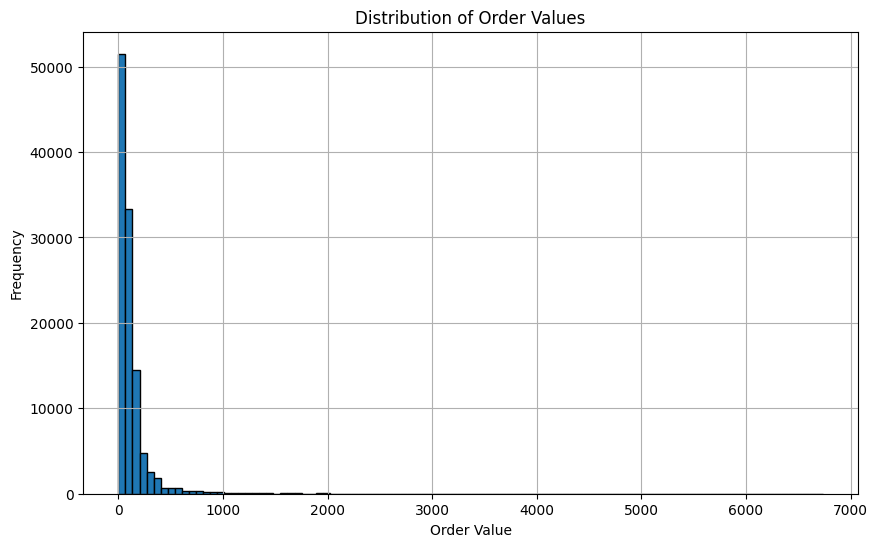

In [22]:
import matplotlib.pyplot as plt

# Distribution of Order Values
plt.figure(figsize=(10, 6))
order_items['price'].plot(kind='hist', bins=100, edgecolor='k')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Analysis : Most of the orders are small values

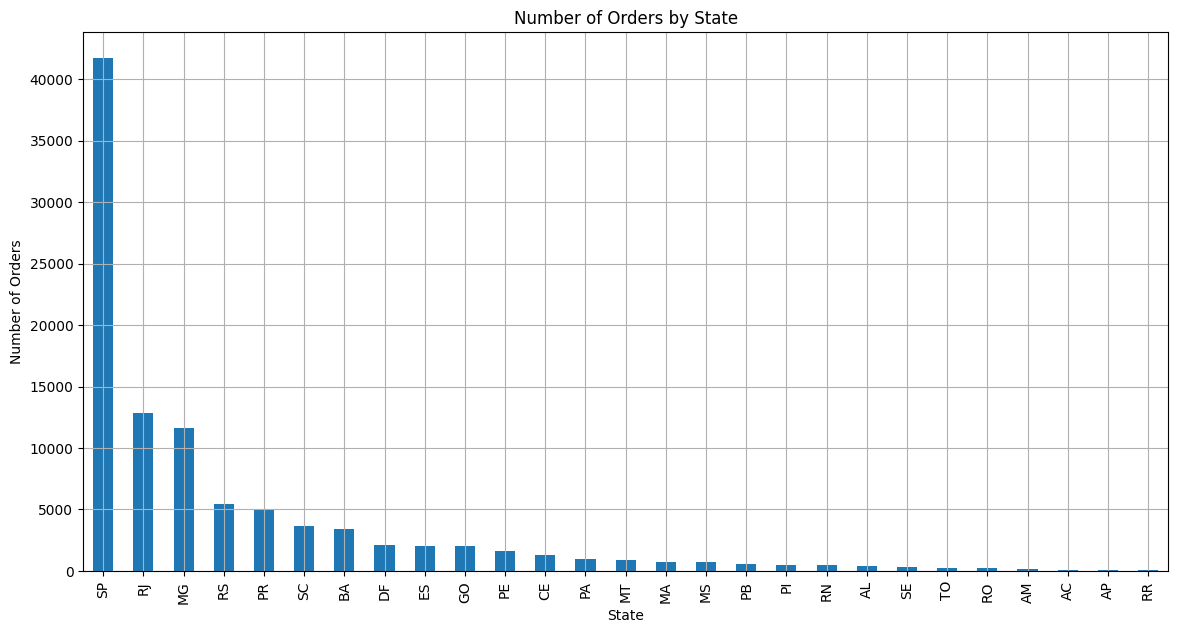

In [14]:
# Merging Orders with Customers to get the state information
orders_with_state_df = orders.merge(customers, on='customer_id')

# Count of orders by state
orders_by_state = orders_with_state['customer_state'].value_counts()

# Plotting the number of orders by state
plt.figure(figsize=(14, 7))
orders_by_state.plot(kind='bar')
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


### Analysis : Most orders are from Sao Paulo

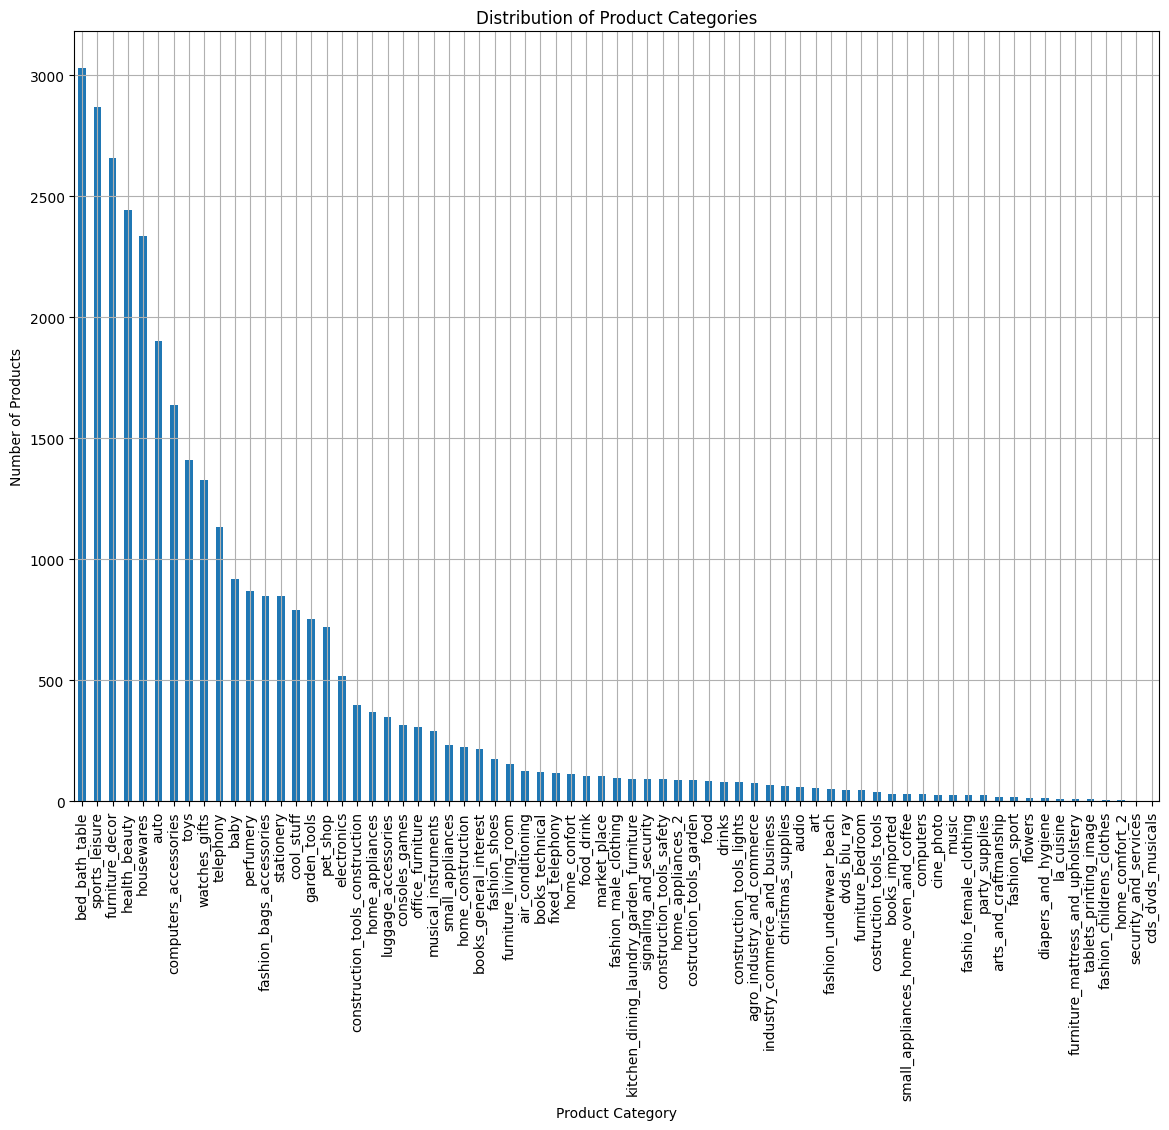

In [15]:
# Merging Products with Product Category Translation
products_with_category_df = products.merge(product_category_translation, on='product_category_name')

# Count of products by category
product_category_counts = products_with_category_df['product_category_name_english'].value_counts()

# Plotting the distribution of product categories
plt.figure(figsize=(14, 10))
product_category_counts.plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


### Analysis : We see that we have a number of categories to play around with 

In [16]:
# Merging Orders with Customers
orders_customers_df = orders.merge(customers, on='customer_id')

# Merging Orders with Order Items
orders_items_df = orders_customers_df.merge(order_items, on='order_id')

# Merging Orders with Order Reviews
orders_reviews_df = orders_items_df.merge(reviews, on='order_id', how='left')

# Merging Order Items with Products
orders_products_df = orders_reviews_df.merge(products_with_category_df, on='product_id')

# Displaying the first few rows of the master dataset
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


Let's checkout how are the delivery times looking like

/var/folders/qm/2m60vf_d5z3b2hf93l6yznfr0000gn/T/ipykernel_5912/891156007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_time_df['delivery_time_days'] = (delivery_time_df['order_delivered_customer_date'] - delivery_time_df['order_purchase_timestamp']).dt.days


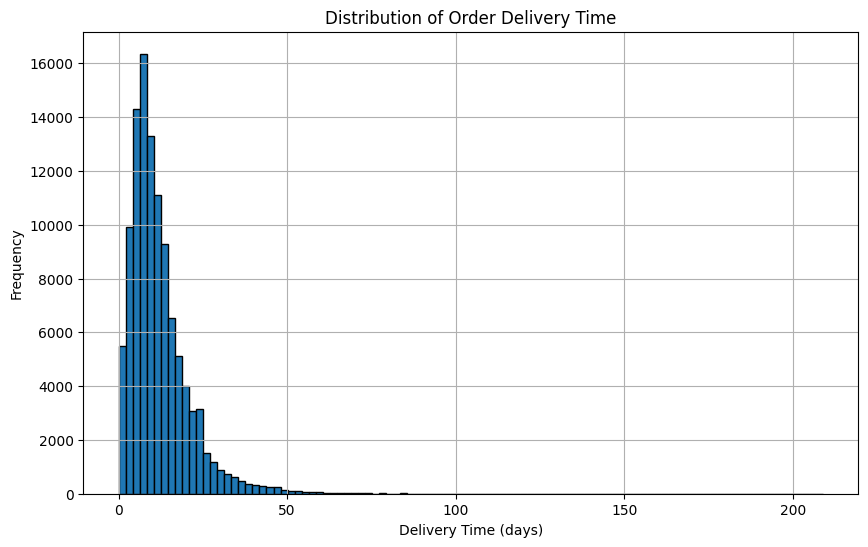

In [21]:
# Calculate delivery time in days
orders_products_df['order_purchase_timestamp'] = pd.to_datetime(orders_products_df['order_purchase_timestamp'])
orders_products_df['order_delivered_customer_date'] = pd.to_datetime(orders_products_df['order_delivered_customer_date'])

# Remove rows where delivery date is missing
delivery_time_df = orders_products_df.dropna(subset=['order_delivered_customer_date'])
delivery_time_df['delivery_time_days'] = (delivery_time_df['order_delivered_customer_date'] - delivery_time_df['order_purchase_timestamp']).dt.days

# Plot the distribution of delivery time
plt.figure(figsize=(10, 6))
delivery_time_df['delivery_time_days'].plot(kind='hist', bins=100, edgecolor='k')
plt.title('Distribution of Order Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Next, we check the most ordered products

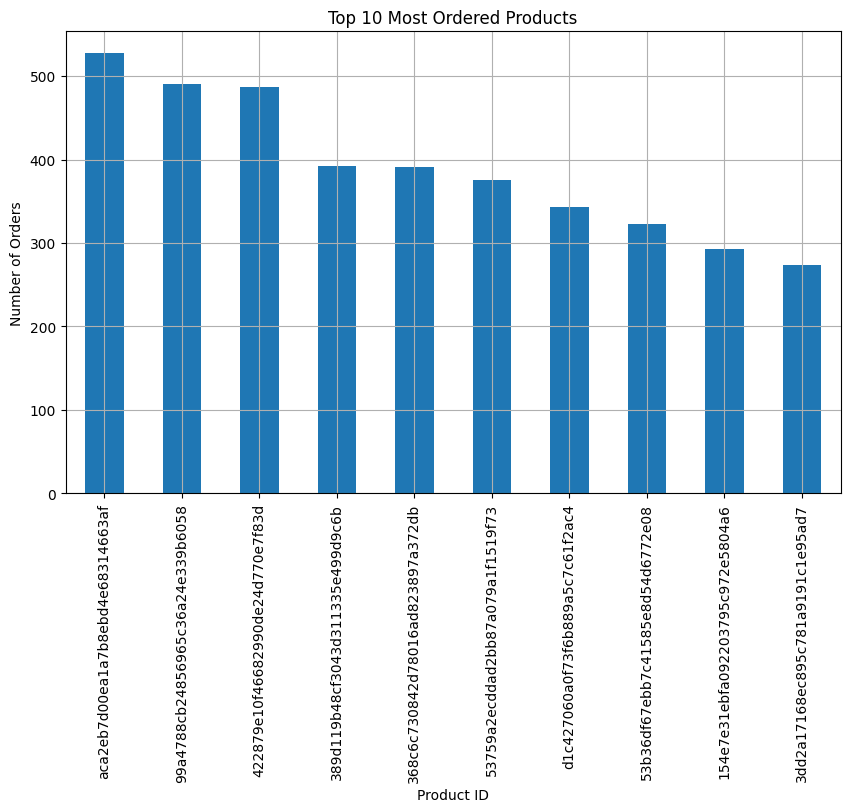

In [25]:
# Calculate the number of orders per product
product_order_counts = orders_products_df['product_id'].value_counts().head(10)

# Plot the most ordered products
plt.figure(figsize=(10,6))
product_order_counts.plot(kind='bar')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


Let's also see which cateogiers are most ordered

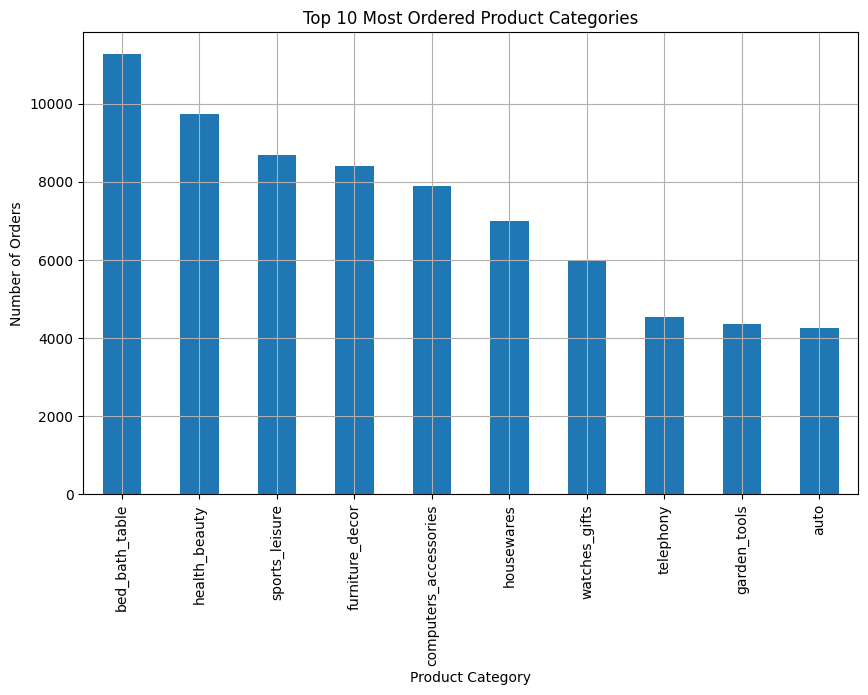

In [26]:
# Calculate the number of orders per product category
category_order_counts = orders_products_df['product_category_name_english'].value_counts().head(10)

# Plot the most ordered product categories
plt.figure(figsize=(10, 6))
category_order_counts.plot(kind='bar')
plt.title('Top 10 Most Ordered Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()
